# Setup
Install TensorFlow 2.0 and import python libraries

In [1]:
!pip install tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 85kB/s 
     |████████████████████████████████| 501kB 50.2MB/s 
     |████████████████████████████████| 3.1MB 44.6MB/s 


In [2]:
"""Implementation of the Feed Forward Autoencoder in TensorFlow 2.0"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

__version__ = '1.0.0'
__author__ = 'Richard Ricardo'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from autoencoder import *

tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)
tf.random.set_seed(1)
np.random.seed(1)

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

Using TensorFlow backend.


TensorFlow version: 2.0.0-beta1
Is Executing Eagerly? True


# Process the dataset

In [3]:
(training_features, _), (test_features, _) = mnist.load_data()

training_features = training_features / 255.

training_features = training_features.astype(np.float32)
training_features = training_features.reshape(training_features.shape[0], 784)
test_features = test_features.reshape(test_features.shape[0], 784)

training_dataset = tf.data.Dataset.from_tensor_slices(training_features)
training_dataset = training_dataset.prefetch(1024)
training_dataset = training_dataset.shuffle(1024)
training_dataset = training_dataset.batch(128)

11493376/11490434 [==============================] - 0s 0us/step


W0825 06:26:02.552144 140228537472896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/util/random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Autoencoder Class with 1 layer

##Train the Autoencoder Model

Set the *num_hidden_layer* as **1**, then instantiate the autoencoder model and choose an optimization function. Pass the **intermediate dimension** & **original dimension of the images**, **number of dense layers**, **encoding dimension**, and **decoding dimension**.

In [4]:
num_hidden_layers = int(input("Enter number of hidden layers: "))

Enter number of hidden layers: 1


In [5]:
model = Autoencoder(intermediate_dim=512, code_dim=256, original_dim=784, num_hidden_layers=num_hidden_layers, encoder_decrements=32, decoder_increments=32)

train_loop(model, loss, training_dataset, 10)

Epoch 1/10. Loss: 7.832603931427002
Epoch 2/10. Loss: 3.5404231548309326
Epoch 3/10. Loss: 3.0518088340759277
Epoch 4/10. Loss: 2.784379243850708
Epoch 5/10. Loss: 2.628765821456909
Epoch 6/10. Loss: 2.521852493286133
Epoch 7/10. Loss: 2.4565322399139404
Epoch 8/10. Loss: 2.3793017864227295
Epoch 9/10. Loss: 2.3438637256622314
Epoch 10/10. Loss: 2.300255060195923


## Plot the Training Performance

Display the model training performance.

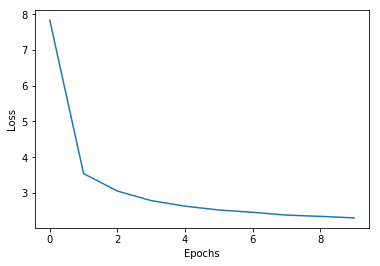

In [6]:
plt.plot(range(10), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Display the Model Predictions

Compare the original images to the reconstruced images of the model.

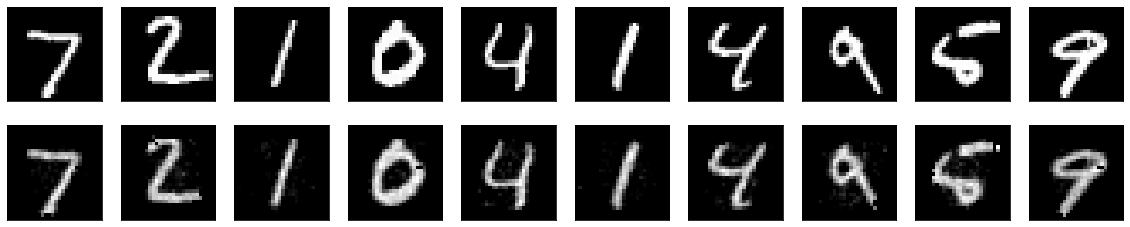

In [7]:
number = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for index in range(number):
    # Display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(test_features[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(test_features)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Autoencoder Class with 3 layers

## Train the Autoencoder Model

Set the *num_hidden_layer* as **3**, then instantiate the autoencoder model and choose an optimization function. Pass the **intermediate dimension** & **original dimension of the images**, **number of dense layers**, **encoding dimension**, and **decoding dimension**.

In [8]:
num_hidden_layers = int(input("Enter number of hidden layers: "))

Enter number of hidden layers: 3


In [9]:
model = Autoencoder(intermediate_dim=512, code_dim=256, original_dim=784, num_hidden_layers=num_hidden_layers, encoder_decrements=32, decoder_increments=32)

train_loop(model, loss, training_dataset, 10)

Epoch 1/10. Loss: 13.715576171875
Epoch 2/10. Loss: 6.8095269203186035
Epoch 3/10. Loss: 5.8326921463012695
Epoch 4/10. Loss: 5.401946067810059
Epoch 5/10. Loss: 5.113909721374512
Epoch 6/10. Loss: 4.947467803955078
Epoch 7/10. Loss: 4.703684329986572
Epoch 8/10. Loss: 4.618189811706543
Epoch 9/10. Loss: 4.544148921966553
Epoch 10/10. Loss: 4.487819671630859


## Plot the Training Performance

Display the model training performance.

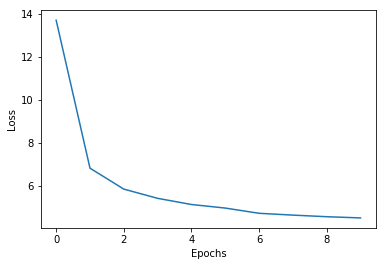

In [10]:
plt.plot(range(10), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Display the Model Predictions

Compare the original images to the reconstruced images of the model.

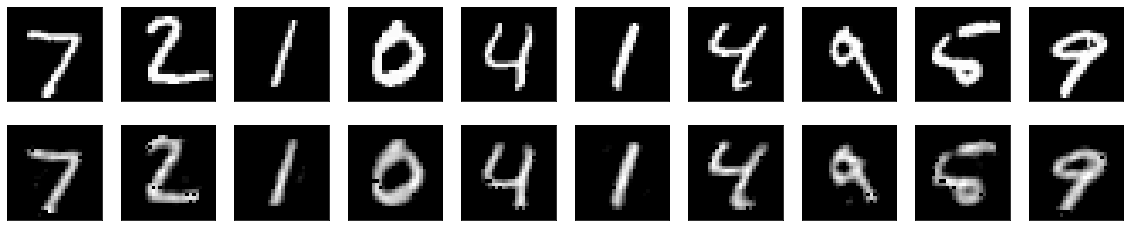

In [11]:
number = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for index in range(number):
    # Display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(test_features[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(test_features)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Autoencoder Class with 5 layers

## Train the Autoencoder Model

Set the *num_hidden_layer* as **5**, then instantiate the autoencoder model and choose an optimization function. Pass the **intermediate dimension** & **original dimension of the images**, **number of dense layers**, **encoding dimension**, and **decoding dimension**.

In [12]:
num_hidden_layers = int(input("Enter number of hidden layers: "))

Enter number of hidden layers: 5


In [13]:
model = Autoencoder(intermediate_dim=512, code_dim=256, original_dim=784, num_hidden_layers=num_hidden_layers, encoder_decrements=32, decoder_increments=32)

train_loop(model, loss, training_dataset, 10)

Epoch 1/10. Loss: 23.072277069091797
Epoch 2/10. Loss: 11.910630226135254
Epoch 3/10. Loss: 9.656087875366211
Epoch 4/10. Loss: 8.572039604187012
Epoch 5/10. Loss: 7.838066577911377
Epoch 6/10. Loss: 7.357515811920166
Epoch 7/10. Loss: 7.085113525390625
Epoch 8/10. Loss: 6.754767417907715
Epoch 9/10. Loss: 6.4524922370910645
Epoch 10/10. Loss: 6.408566474914551


## Plot the Training Performance

Display the model training performance.

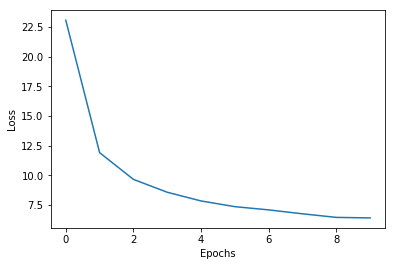

In [14]:
plt.plot(range(10), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Display the Model Predictions

Compare the original images to the reconstruced images of the model.

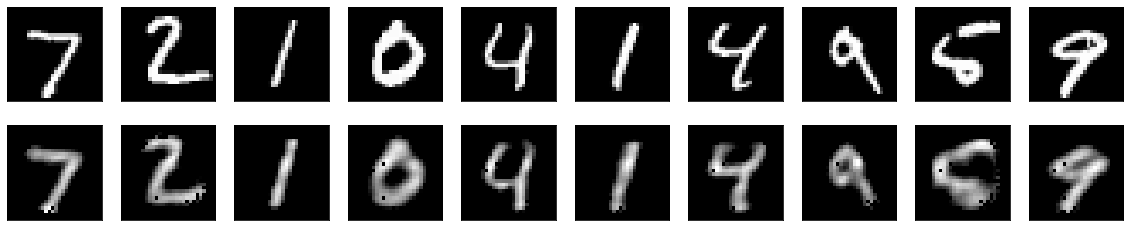

In [15]:
number = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for index in range(number):
    # Display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(test_features[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(test_features)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()